In [9]:
import ROOT
from larlite import *
from ROOT import PandoraNuTrack
from ROOT import AnalyseEvents
import sys; sys.path.insert(0, '../');
%matplotlib inline
# %matplotlib notebook
from IPython.core.display import HTML,display
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac/')
from plot_tools import *
from matplotlib.ticker import NullFormatter

In [3]:
file=ROOT.TFile("/Users/erezcohen/Desktop/uBoone/CCQEanalysis/EventsFiles/EventsFile.root")
tree=file.Get("EventsAnalyzer/eventsTree")
ana=AnalyseEvents(tree)

In [4]:
def gen_tracks_and_hits( ana=None, entry=0 , debug=0 ):
    if ana is None: 
        print "ana is None! returning..."
        return
    ana.GetEntry( entry )
    tracks = ana.GetTracks()
    hits = ana.GetHits()
    if debug:
        print '%d track, %d hits'%(int(tracks.size()),int(hits.size()))
    return hits,tracks

In [5]:
hits , tracks = gen_tracks_and_hits( ana, entry=1 , debug=True )

9 track, 6655 hits


In [6]:
#---------------------------------------------------------------------------------------------
def plot_hits(hits,plane,ax=None,cmap='hot_r',color='',do_add_hit_trkKey=False,do_add_numbers=False):
    hit_wire, hit_time, hit_charge , hit_number , hit_trkKey = [] , [] , [] , [] , []
    # hits in this plane
    for i_hit,hit in enumerate(hits):
        if hit.hit_plane==plane:# and hit_in_box(hit,box=box):
            hit_number.append(i_hit)
            hit_wire.append(hit.hit_wire)
            hit_time.append(hit.hit_peakT)
            hit_charge.append(hit.hit_charge)
            hit_trkKey.append(hit.hit_trkKey)

    if ax is not None and hit_wire is not None and hit_time is not None and hit_charge is not None and len(hit_wire)>0:
        if color == '':
            ax.scatter(hit_wire,hit_time,c=hit_charge, vmin=np.min(hit_charge), vmax=np.max(hit_charge),cmap='hot_r')
        else:
            ax.scatter(hit_wire,hit_time,c=color)
    if do_add_numbers:
        for w,t,n in zip(hit_wire , hit_time, hit_number): ax.text( w , t , n )
    if do_add_hit_trkKey:
        for w,t,trkKey in zip(hit_wire , hit_time, hit_trkKey): 
            if trkKey!=-9999: ax.text( w , t , trkKey )

    return hit_wire, hit_time, hit_charge , hit_number , hit_trkKey
#---------------------------------------------------------------------------------------------

In [16]:
#---------------------------------------------------------------------------------------------
def get_t_start_end(t,plane): # t is a track
    if plane==0:    
        t_start_wire,t_start_time = t.start_wire_u, t.start_time_u                
        t_end_wire,t_end_time = t.end_wire_u, t.end_time_u
    elif plane==1:                
        t_start_wire,t_start_time = t.start_wire_v, t.start_time_v                                    
        t_end_wire,t_end_time = t.end_wire_v, t.end_time_v                
    elif plane==2:                            
        t_start_wire,t_start_time = t.start_wire_y, t.start_time_y                                    
        t_end_wire,t_end_time = t.end_wire_y, t.end_time_y            
    return t_start_wire , t_start_time , t_end_wire , t_end_time
#---------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------
def plot_tracks(hits,plane,ax=None,cmap='hot_r',color='',do_add_numbers=False):
    for t in tracks:
        color, label = set_color_label(t)
        t_start_wire , t_start_time , t_end_wire , t_end_time = get_t_start_end(t,plane)
        plt.plot([t_start_wire,t_end_wire],[t_start_time,t_end_time],color=color)
        plt.text(t_start_wire + 0.3*(t_end_wire-t_start_wire),t_start_time,label,color=color,fontsize=20)
#---------------------------------------------------------------------------------------------


# ------------------------------------------------
def set_color_label(t,do_add_PfromRange=False):
    
    pdg = t.MCpdgCode
    t_length = t.length

    if pdg==-13:
        color = 'black'
        label = '$\\mu^+$'
    elif pdg==13:
        color = 'black'
        label = '$\\mu^-$'
    elif pdg==-11:
        color = 'red'
        label = '$e^+$'
    elif pdg==11:
        color = 'red'
        label = '$e^-$'
    elif pdg==2212:
        color = 'blue'
        label = '$p$'
    elif pdg==2112:
        color = 'salmon'
        label = '$n$'
    elif pdg==-211:
        color = 'slateblue'
        label = '$\\pi^-$'
    elif pdg==211:
        color = 'slateblue'
        label = '$\\pi^+$'
    elif pdg==111:
        color = 'slateblue'
        label = '$\\pi^0$'
    elif pdg==22:
        color = 'cyan'
        label = '$\\gamma$'
    else:
        color = 'purple'
        label = '%d'%pdg
        
    if do_add_PfromRange:
        Ptruth = t.truth_P
        if np.abs(pdg)==13:
            PfromRange = 0.001*muon_momontum_from_range(t_length)
    return color , label
# ------------------------------------------------

In [14]:
def draw_event_display( hits=None, tracks=None , do_add_legend=False, planes=[0,1,2], do_add_hit_trkKey=False ):
    fig=plt.figure(figsize=(28,8))
    for plane in planes:
        ax=fig.add_subplot(1,3,plane+1)
        plot_hits(hits , plane=plane , ax=ax , cmap='hot_r',color='', do_add_hit_trkKey=do_add_hit_trkKey)
        plot_tracks(tracks , plane=plane , ax=ax )
        if do_add_legend and plane==2: ax.add_legend(bbox_to_anchor(1,1.05),loc=2,fontsize=20)
        set_axes(ax,'wire','time tick' if plane==0 else '',xticks=np.linspace(np.min(ax.get_xlim()),np.max(ax.get_xlim()),5))
        if plane>0: ax.yaxis.set_major_formatter( NullFormatter() )

1 2756 137752 0 797
1 2756 137752 1 632
1 2756 137752 2 1970
1 2756 137752 3 633
1 2756 137752 4 2016
1 2756 137752 5 589
1 2756 137752 6 1532
1 2756 137752 7 1532
1 2756 137752 8 632


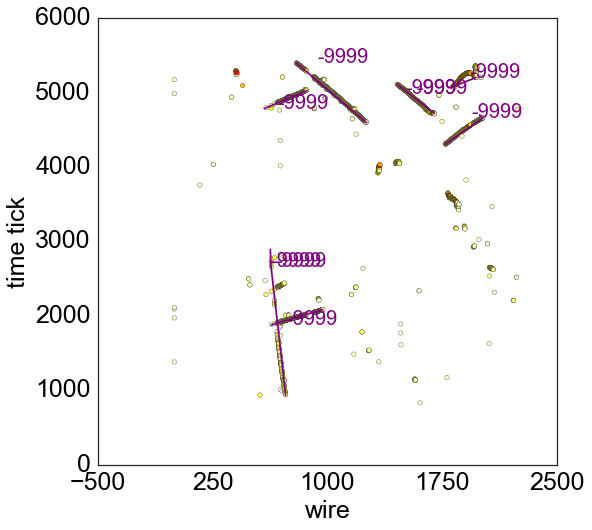

In [17]:
draw_event_display( hits , tracks , planes=[0])